<a href="https://colab.research.google.com/github/Japko2/Python_projekt/blob/main/Projekt_amplituda_okres.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema as extr
from scipy.signal import argrelmin as extrmin
from scipy.signal import argrelmax as extrmax

In [ ]:

def maksimum(wczyt):
    temp=[]
    temp_i=extrmax(wczyt)

    for i in range(0,len(temp_i[0])):
        temp.append(wczyt[temp_i[0][i]])
    return temp, temp_i[0]

def minimum(wczyt):
    temp=[]
    temp_i=extrmin(wczyt)

    for i in range(0,len(temp_i[0])):
        temp.append(wczyt[temp_i[0][i]])
    return temp, temp_i[0]

def krok(dane):
    h=0
    for i in range(0, len(dane)-1):
        h=h+abs(dane[i]-dane[i+1])
    h=h/len(dane)
    return h

def Amplituda(tab_max,tab_min):
    Amp_max=0
    Amp_min=0
    Amp = 0
    iter = 2
    if len(tab_max)-len(tab_min)<0:
        iter = len(tab_max)
    elif len(tab_max)-len(tab_min) > 0:
        iter = len(tab_min)
    elif len(tab_max)-len(tab_min) == 0:
        iter = len(tab_max)
    #print(iter)
    for i in range(0,iter):
        Amp=Amp+(tab_max[i]-tab_min[i])*0.5
    Amp = Amp/iter
    return Amp

def OkresAmp(dane):
    temp_max_i=[]
    temp_min_i=[]
    temp_max=[]
    temp_min=[]
    margin = krok(dane)
    T=[]
    T_max=0
    T_min=0
    temp_max, temp_max_i= maksimum(dane)
    temp_min, temp_min_i = minimum(dane)
    Amplit=Amplituda(temp_max,temp_min)
    if(len(temp_max_i)>=len(temp_min_i)):
        iter = len(temp_min_i)
    elif len(temp_max_i)<len(temp_min_i):
        iter = len(temp_max_i)
    for i in range(0, iter):
        T.append(abs(temp_max_i[i]-temp_min_i[i]))
    T=np.array(T)
    T=np.mean(T)
    T=T*2
    return T,Amplit

In [ ]:
class przeplyw:
    def __init__(self, name):
        self.name = name
        dane = np.loadtxt(name+'.txt', comments ="#", skiprows = 2, unpack= True)
        self.u = dane[1,:]
        self.v = dane[2,:]
        self.w = dane[3,:]
        self.p = dane[4,:]
        kernel_size = 36
        kernel = np.ones(kernel_size)/kernel_size
        self.p = np.convolve(self.p, kernel, mode='same')
        self.Tu, self.Au = OkresAmp(self.u)
        self.Tv, self.Av = OkresAmp(self.v)
        self.Tw, self.Aw = OkresAmp(self.w)
        self.Tp, self.Ap = OkresAmp(self.p)
    def wypisz(self):
        print('param dla: \nu: Tu=',self.Tu,'Au=',self.Au,'\nv:','Tv=',self.Tv,'Av=',self.Av,'\nw:','Tw=',self.Tw,'Aw=',self.Aw,'\np: Tp=',self.Tp,'Ap=',self.Ap)
    def wykresy(self):
        figure, axis = plt.subplots(2, 2)

        axis[0, 0].plot(self.u)
        axis[0, 0].set_title("u chart")

        axis[0, 1].plot(self.v)
        axis[0, 1].set_title("v chart")

        axis[1, 0].plot(self.w)
        axis[1, 0].set_title("w chart")

        axis[1, 1].plot(self.p)
        axis[1, 1].set_title("p chart")

        plt.show()


In [ ]:
test=['60_point','65_point', '70_point','80_point', '90_point', '100_point', '110_point', '120_point', '150_point']


In [ ]:
set=[]
for i in test:
    set.append(przeplyw(i))


0 .
60_point
param dla: 
u: Tu= 18804.0 Au= 0.03697276722648446 
v: Tv= 9336.0 Av= 0.0009536358592698159 
w: Tw= 9388.0 Aw= 0.0033266438571021573 
p: Tp= 6590.0 Ap= 0.0005457510447084721


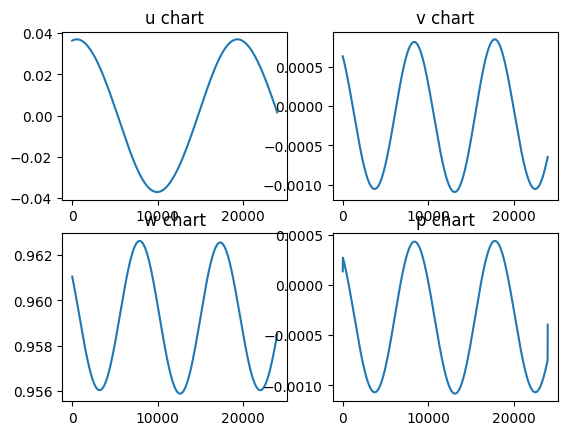





1 .
65_point
param dla: 
u: Tu= 18828.0 Au= 0.07881347388799073 
v: Tv= 9090.666666666666 Av= 0.004653296961545682 
w: Tw= 9536.0 Aw= 0.01458508177131454 
p: Tp= 9184.666666666666 Ap= 0.0033519660202555187


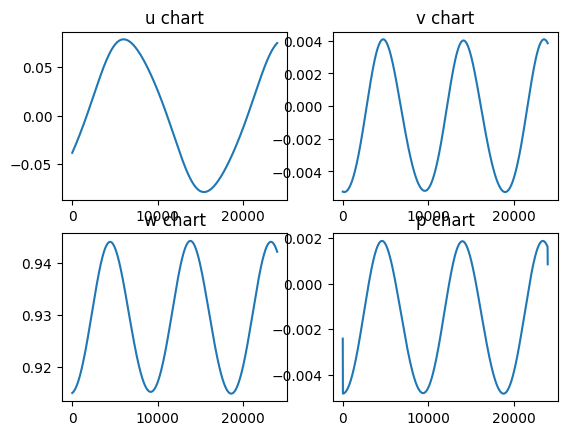





2 .
70_point
param dla: 
u: Tu= 18898.0 Au= 0.0992278039393875 
v: Tv= 8822.0 Av= 0.007577765827213167 
w: Tw= 9169.0 Aw= 0.022227960900716992 
p: Tp= 6118.0 Ap= 0.0034791422970204887


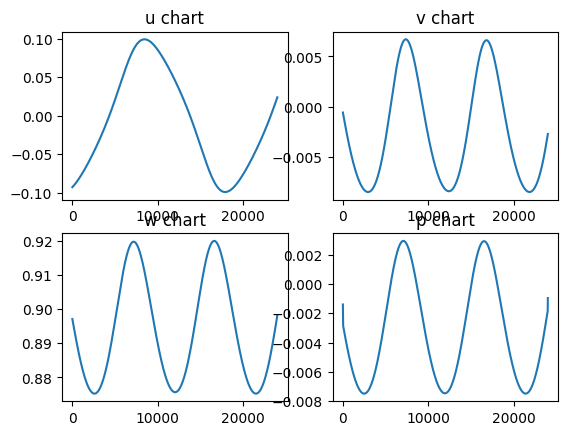





3 .
80_point
param dla: 
u: Tu= 19058.0 Au= 0.11638331613812636 
v: Tv= 10730.0 Av= 0.010666362071441216 
w: Tw= 10130.0 Aw= 0.028448492121470936 
p: Tp= 7648.0 Ap= 0.006049974209705769


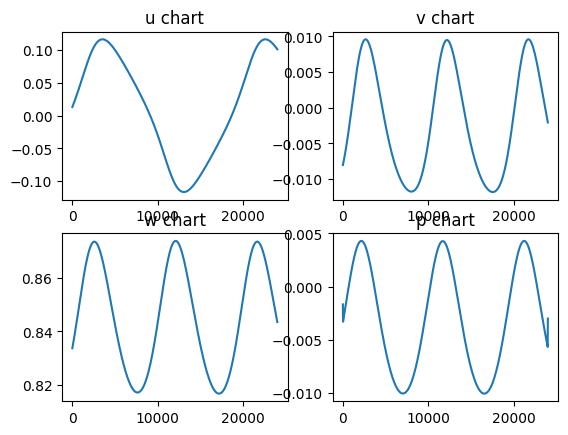





4 .
90_point
param dla: 
u: Tu= 19208.0 Au= 0.1204708633190532 
v: Tv= 11194.0 Av= 0.01169286591631315 
w: Tw= 8820.0 Aw= 0.028618195392753676 
p: Tp= 5524.8 Ap= 0.004641192367772486


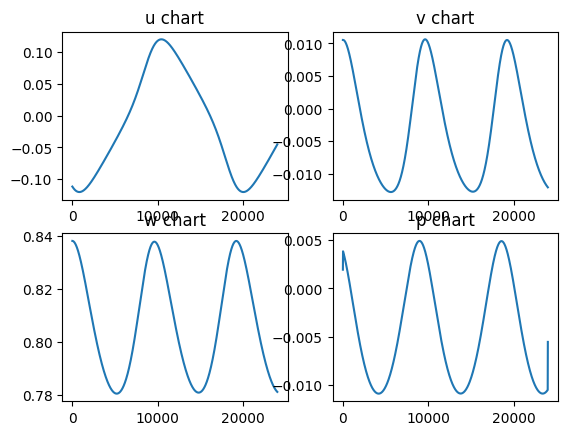





5 .
100_point
param dla: 
u: Tu= 19296.0 Au= 0.11960427535597873 
v: Tv= 11448.0 Av= 0.01184320765720116 
w: Tw= 10509.0 Aw= 0.026607963911320198 
p: Tp= 7042.5 Ap= 0.006085595574469534


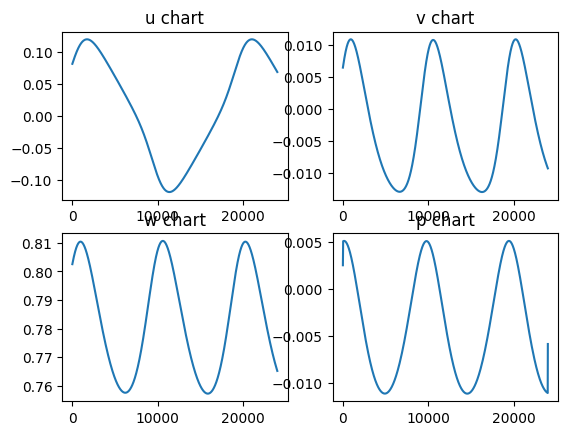





6 .
110_point
param dla: 
u: Tu= 19374.0 Au= 0.11671540528487542 
v: Tv= 7848.0 Av= 0.011611099974211662 
w: Tw= 8844.0 Aw= 0.02399432512217614 
p: Tp= 9886.0 Ap= 0.008071135457305437


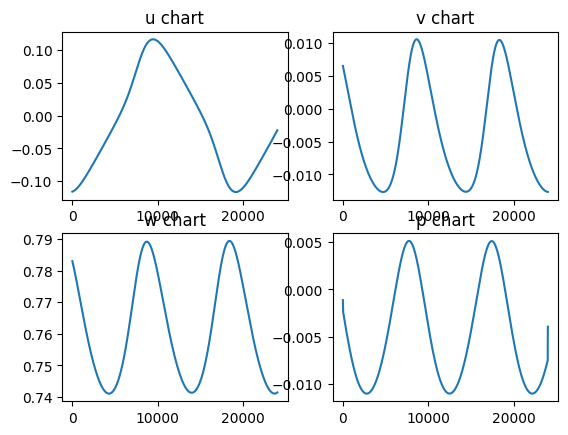





7 .
120_point
param dla: 
u: Tu= 19438.0 Au= 0.11301498344712829 
v: Tv= 11498.0 Av= 0.011194166665268828 
w: Tw= 10509.0 Aw= 0.021371574463945275 
p: Tp= 8996.666666666666 Ap= 0.00775359917890299


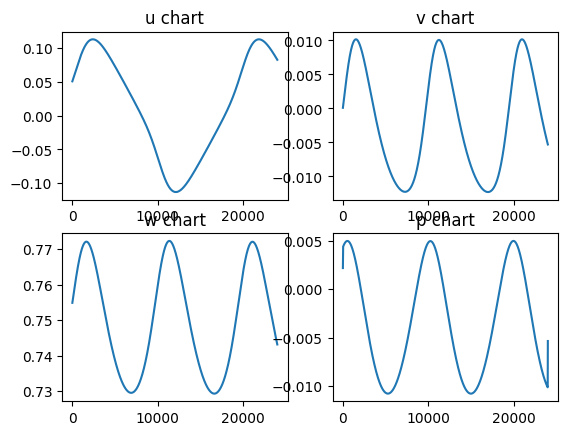





8 .
150_point
param dla: 
u: Tu= 19568.0 Au= 0.1014492662343453 
v: Tv= 8637.0 Av= 0.009651508270273898 
w: Tw= 9424.0 Aw= 0.015336103122698896 
p: Tp= 10045.0 Ap= 0.006787864549823817


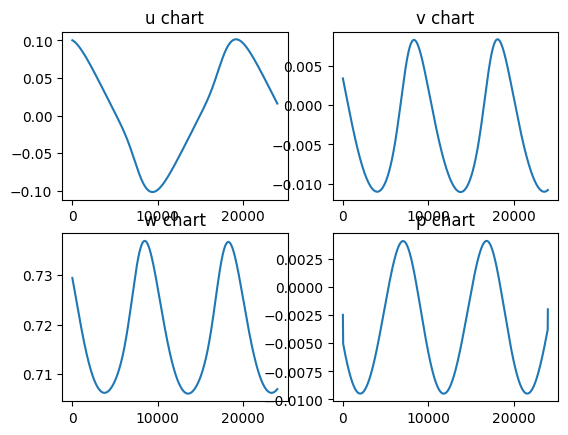

In [ ]:
for i in range(0, len(set)):
    print(i,'.')
    print(set[i].name)
    set[i].wypisz()
    #print(maksimum(set[i].p))
    set[i].wykresy()
    print('\n\n\n')